<a href="https://colab.research.google.com/github/Edenshmuel/ICU_Nutrition_ML/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to Kaggle: https://www.kaggle.com/datasets/bitanianielsen/nutrition-daily-meals-in-diseases-cases/data?select=detailed_meals_macros_.csv

In [1]:
!git clone https://github.com/Edenshmuel/ICU_Nutrition_ML.git

Cloning into 'ICU_Nutrition_ML'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 318.29 KiB | 1.69 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [11]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Edenshmuel/ICU_Nutrition_ML/refs/heads/main/Food_and_Nutrition__.csv")
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [ ]:
print(df.describe())

              Ages       Height       Weight  Daily Calorie Target  \
count  1698.000000  1698.000000  1698.000000           1698.000000   
mean     43.961720   174.130153    78.064193           2275.171967   
std      15.915002    13.420936    16.949264            558.812405   
min      18.000000   150.000000    48.000000           1200.000000   
25%      30.000000   163.250000    64.000000           1800.000000   
50%      42.000000   174.000000    78.000000           2200.000000   
75%      57.000000   185.000000    91.000000           2689.000000   
max      79.000000   200.000000   119.000000           4364.000000   

           Protein        Sugar       Sodium     Calories  Carbohydrates  \
count  1698.000000  1698.000000  1698.000000  1698.000000    1698.000000   
mean    139.898115   126.192580    27.979623  2196.440518     252.385159   
std      53.326588    34.938902    10.665318   571.089569      69.877804   
min      50.000000    60.000000    10.000000   990.000000     120

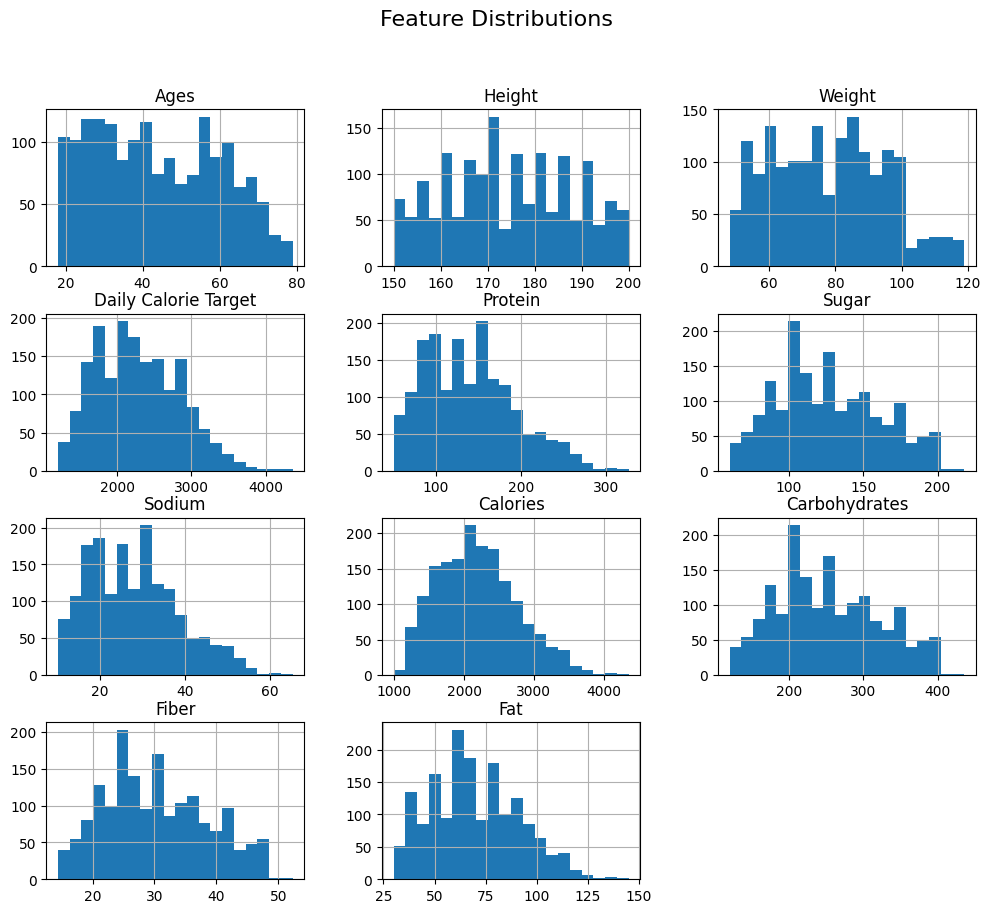

In [12]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

For right-skewed distributions, applying a logarithmic transformation can reduce the impact of extreme values and make the distribution closer to a normal distribution.

In [13]:
import numpy as np

right_skewed_features = ["Protein", "Sugar", "Sodium", "Carbohydrates", "Fat"]
df_log_transformed = df.copy()
df_log_transformed[right_skewed_features] = df_log_transformed[right_skewed_features].apply(lambda x: np.log1p(x))

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_log_transformed[right_skewed_features] = scaler.fit_transform(df_log_transformed[right_skewed_features])

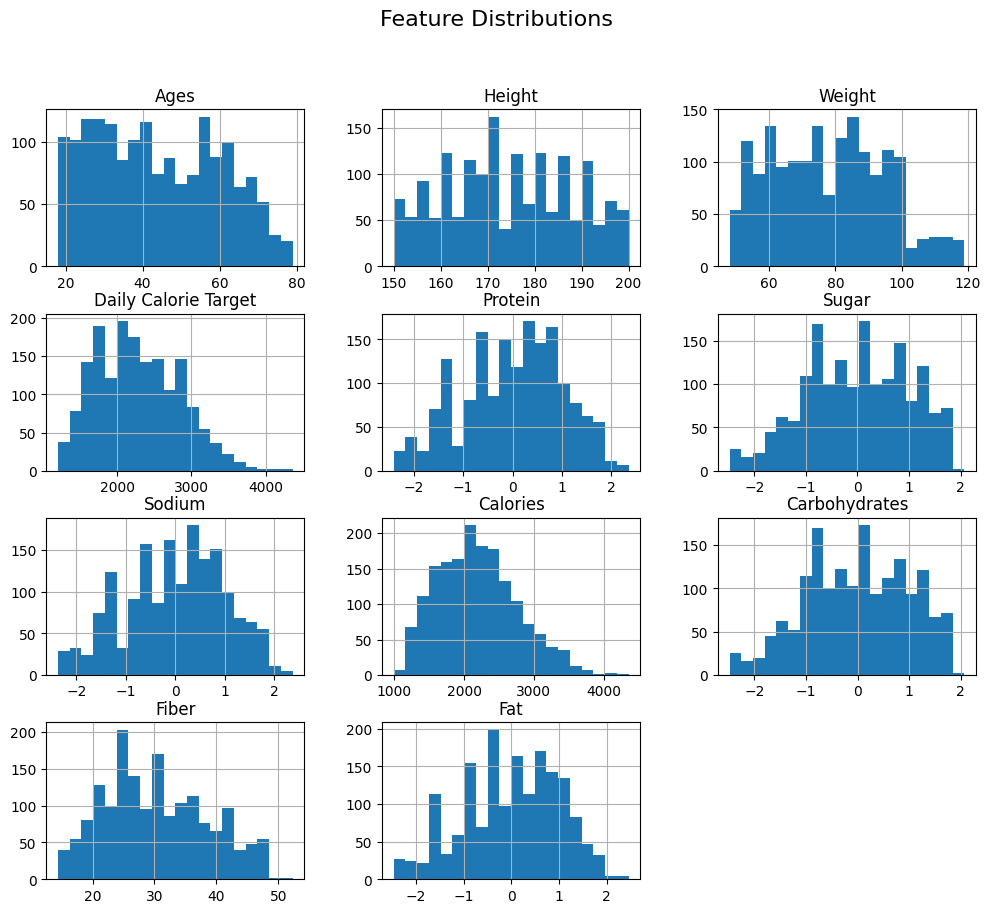

In [17]:
df_log_transformed.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

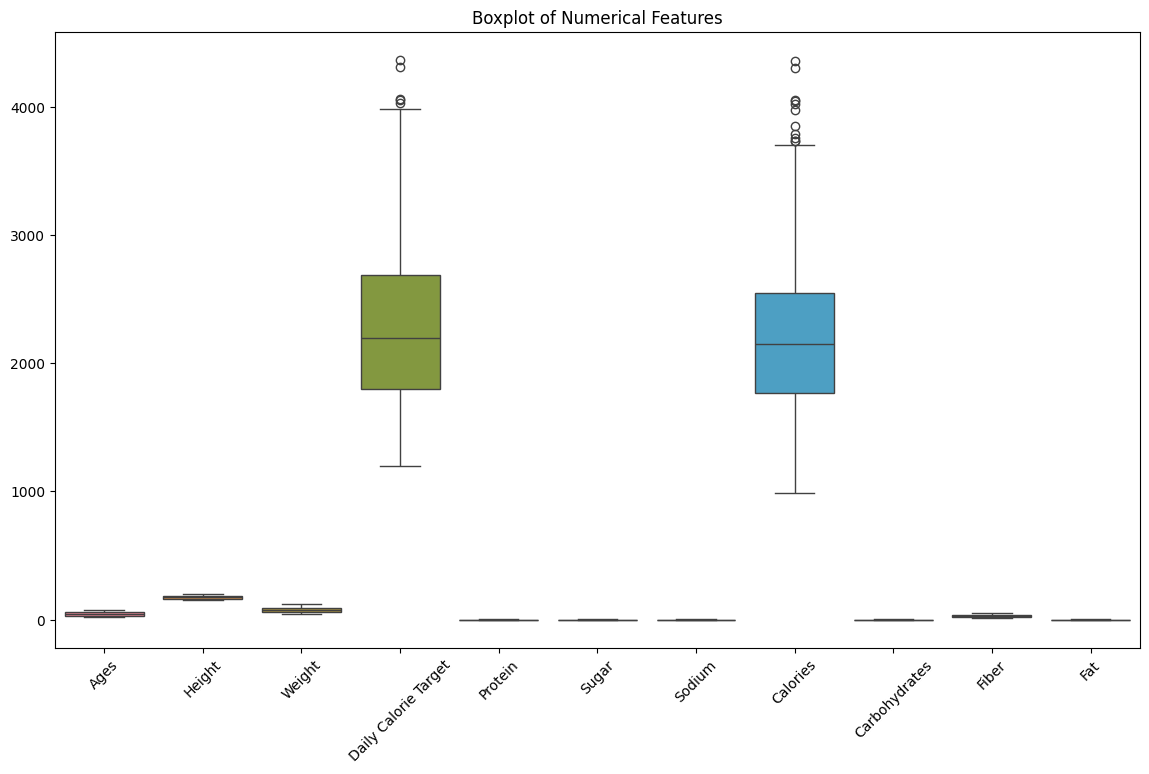

In [22]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_log_transformed)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

In [23]:
columns_with_outliers = ["Daily Calorie Target","Calories"]

Q1 = df_log_transformed[columns_with_outliers].quantile(0.25)
Q3 = df_log_transformed[columns_with_outliers].quantile(0.75)
IQR = Q3 - Q1

outliers = df_log_transformed[columns_with_outliers][(df_log_transformed[columns_with_outliers] < (Q1 - 1.5 * IQR)) |
                                     (df_log_transformed[columns_with_outliers] > (Q3 + 1.5 * IQR))]

print(outliers.dropna(how='all'))

      Daily Calorie Target  Calories
1048                4029.0    4022.0
1066                4364.0    4357.0
1091                   NaN    3972.0
1166                4057.0    4051.0
1208                4307.0    4299.0
1377                   NaN    3757.0
1512                   NaN    3848.0
1531                   NaN    3732.0
1561                   NaN    3732.0
1628                4053.0    4047.0
1651                   NaN    3786.0


After reviewing the outliers, the caloric values seem reasonable as they belong to high-intensity athletes with only "Weight Gain", which doesn’t always require weight loss. For now, I'll keep the data, and if needed, apply a log transformation to the target variables later.

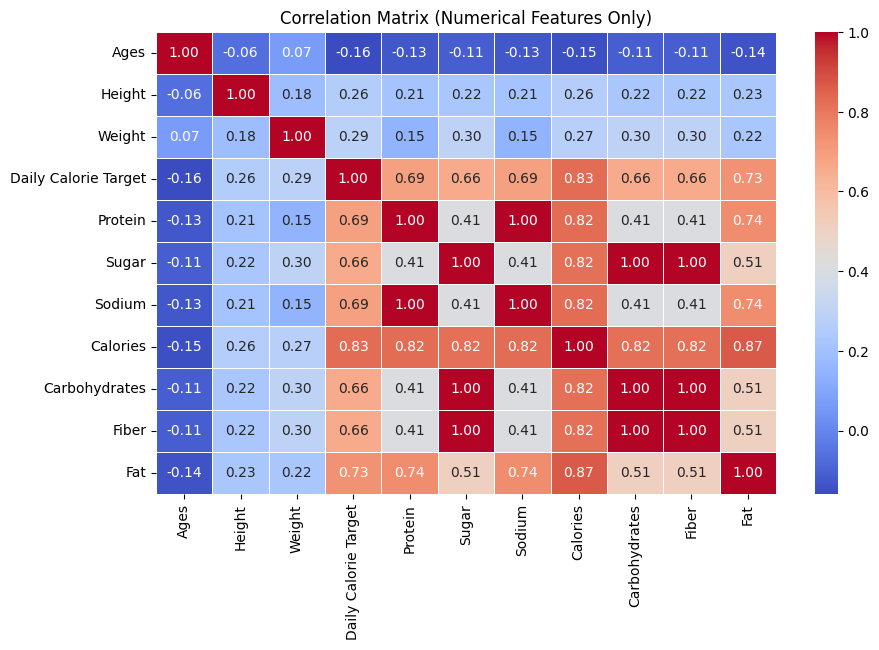

In [ ]:
import numpy as np

numerical_columns = ['Ages', 'Height', 'Weight', 'Daily Calorie Target', 'Protein',
                     'Sugar', 'Sodium', 'Calories', 'Carbohydrates', 'Fiber', 'Fat']

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

I will need to remove the "Calories" column to prevent data leakage in prediction. Surprisingly, height and weight have less impact on the recommended calorie intake, while protein, sodium, and fat have a greater influence.

In the correlation analysis, I observed that carbohydrates, sugar, and fiber have a perfect correlation (1). Upon examining the data, I noticed that:

*   The sugar value is equal to half the carbohydrate value.
*   The fiber value is equal to 8.333.. of the   
carbohydrate value.

To verify this, I will check the percentage of cases where these relationships hold true.

In [4]:
df["Carbohydrates_half"] = df["Carbohydrates"] * 0.5
df["sugar_match"] = df["Carbohydrates_half"] == df["Sugar"]

expected_ratio = 8 + (1/3)
df["fiber_ratio"] = df["Carbohydrates"] / df["Fiber"]
df["fiber_match"] = df["fiber_ratio"] == expected_ratio

sugar_match_percentage = df["sugar_match"].mean() * 100
fiber_match_percentage = df["fiber_match"].mean() * 100

print(f"Percentage of cases where Sugar = 0.5 * Carbohydrates: {sugar_match_percentage:.2f}%")
print(f"Percentage of cases where Carbohydrates / Fiber = 8 + 1/3: {fiber_match_percentage:.2f}%")

Percentage of cases where Sugar = 0.5 * Carbohydrates: 100.00%
Percentage of cases where Carbohydrates / Fiber = 8 + 1/3: 72.97%


In [5]:
tolerance = 0.01

df["sugar_match"] = abs(df["Carbohydrates_half"] - df["Sugar"]) <= tolerance
df["fiber_match"] = abs(df["fiber_ratio"] - expected_ratio) <= tolerance

sugar_match_percentage = df["sugar_match"].mean() * 100
fiber_match_percentage = df["fiber_match"].mean() * 100

print(f"Percentage of cases where Sugar ≈ 0.5 * Carbohydrates: {sugar_match_percentage:.2f}%")
print(f"Percentage of cases where Carbohydrates / Fiber ≈ 8 + 1/3: {fiber_match_percentage:.2f}%")

Percentage of cases where Sugar ≈ 0.5 * Carbohydrates: 100.00%
Percentage of cases where Carbohydrates / Fiber ≈ 8 + 1/3: 100.00%


I will remove Sugar due to its strong linear dependency on Carbohydrates. Fiber will be excluded initially and later tested to see if the model can learn its variability from other features, as 30% of cases show a non-linear relationship.

<ipython-input-18-b16cdea446a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


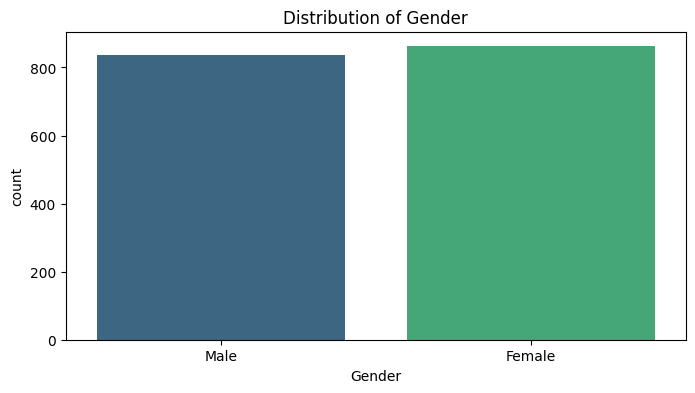

<ipython-input-18-b16cdea446a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


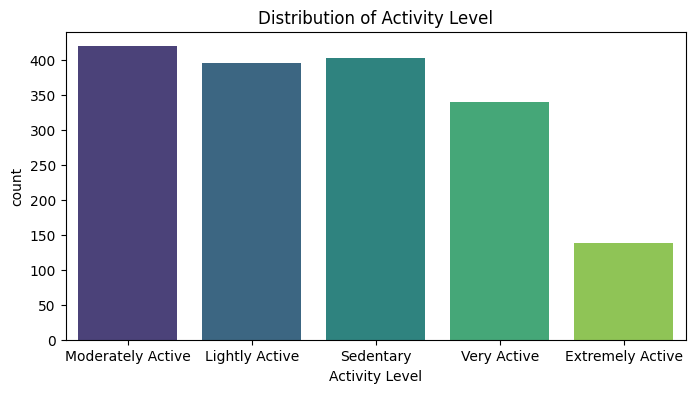

<ipython-input-18-b16cdea446a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


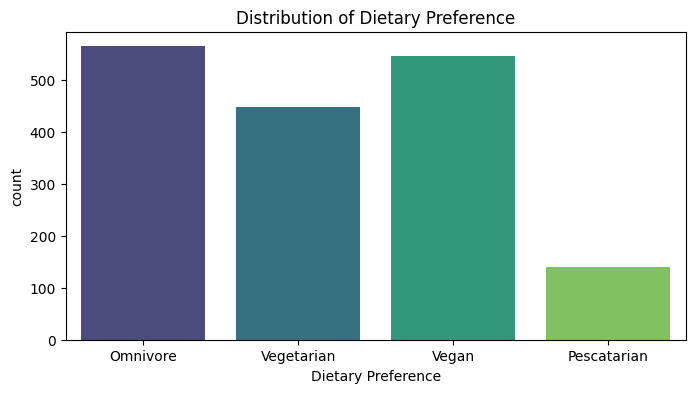

In [ ]:
categorical_columns = ['Gender', 'Activity Level', 'Dietary Preference']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.show()